<a href="https://colab.research.google.com/github/ZhangxjMia/Python-Projects/blob/main/House_Prices_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description
---
Variable Name | Description
--- | ---
id | Unique ID for each home sold
date | Date sold
price | Sale price
bedrooms | Number of bedrooms
bathrooms | Number of bathrooms
sqft_living | Size of living area in square feet
sqft_lot | Size of the lot in square feet
floors | Number of floors
waterfront | 	‘1’ if the property has a waterfront, ‘0’ if not
view | An index from 0 to 4 of how good the view of the property was
condition	| Condition of the house, ranked from 1 to 5
grade	| Classification by construction quality which refers to the types of materials used and the quality of workmanship. <br> Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.
sqft_above | Square feet above ground
sqft_basement	| Square feet below ground
yr_built |	Year built
yr_renovated |	Year renovated. ‘0’ if never renovated
zipcode	| 5 digit zip code
lat |	Latitude
long |	Longitude
squft__living15	| Average size of the closest 15 houses, in square feet
sqft_lot15 | Average size of the closest 15 houses’ lots, in square feet

# Data Preparation

## Import packages & Load csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving KingCountyHousePrice.csv to KingCountyHousePrice.csv


In [3]:
kc = pd.read_csv("KingCountyHousePrice.csv")

## Basic Information

In [4]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7600 non-null   int64  
 1   date           7600 non-null   object 
 2   price          7600 non-null   float64
 3   bedrooms       7600 non-null   int64  
 4   bathrooms      7600 non-null   float64
 5   sqft_living    7600 non-null   int64  
 6   sqft_lot       7600 non-null   int64  
 7   floors         7600 non-null   float64
 8   waterfront     7600 non-null   int64  
 9   view           7600 non-null   int64  
 10  condition      7600 non-null   int64  
 11  grade          7600 non-null   int64  
 12  sqft_above     7600 non-null   int64  
 13  sqft_basement  7600 non-null   int64  
 14  yr_built       7600 non-null   int64  
 15  yr_renovated   7600 non-null   int64  
 16  zipcode        7600 non-null   int64  
 17  lat            7600 non-null   float64
 18  long    

In [6]:
kc.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.600000e+03,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00,7600.00
mean,4.607133e+09,537972.79,3.38,2.07,2063.88,15954.74,1.43,0.01,0.24,3.45,7.61,1759.10,304.78,1967.45,89.84,98077.58,47.56,-122.21,1982.75,13226.10
std,2.869636e+09,383377.18,0.90,0.76,916.53,44267.68,0.51,0.09,0.77,0.67,1.18,816.28,451.92,28.02,413.93,53.93,0.14,0.14,676.09,25602.72
min,1.000102e+06,75000.00,0.00,0.00,380.00,572.00,1.00,0.00,0.00,1.00,3.00,380.00,0.00,1900.00,0.00,98001.00,47.16,-122.51,620.00,660.00
25%,2.141150e+09,316000.00,3.00,1.50,1420.00,5443.75,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1950.00,0.00,98032.00,47.46,-122.32,1500.00,5427.25
50%,3.970500e+09,449950.00,3.00,2.00,1900.00,7911.00,1.00,0.00,0.00,3.00,7.00,1540.00,0.00,1969.00,0.00,98065.00,47.57,-122.23,1840.00,7867.50
75%,7.313400e+09,646250.00,4.00,2.50,2500.00,11108.75,2.00,0.00,0.00,4.00,8.00,2140.00,600.00,1990.00,0.00,98117.00,47.68,-122.12,2350.00,10400.00
max,9.842300e+09,7700000.00,9.00,8.00,12050.00,1651359.00,3.50,1.00,4.00,5.00,13.00,8570.00,3480.00,2015.00,2015.00,98199.00,47.78,-121.32,5790.00,434728.00


In [7]:
# number of NAs for each column
kc.isna().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Remove Redundant Variables 

In [8]:
kc.drop(['id', 'date', 'lat', 'long'], axis=1, inplace=True)
kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


## Detect & Remove Outliers

In [9]:
from scipy import stats
z_scores = stats.zscore(kc)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis = 1)
new_kc = kc[filtered_entries]
new_kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819


In [10]:
new_kc.shape

(6506, 17)

# EDA (Exploratory Data Analysis)

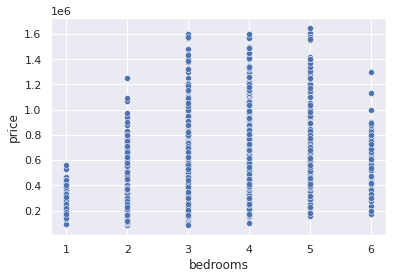

In [11]:
sns.set(color_codes = True)
sns.scatterplot(x = 'bedrooms', y = 'price', data = new_kc)

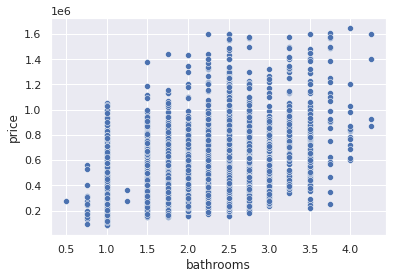

In [12]:
sns.scatterplot(x = 'bathrooms', y = 'price', data = new_kc)

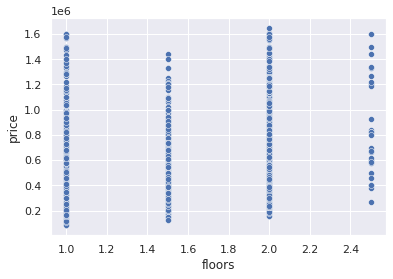

In [13]:
sns.scatterplot(x = 'floors', y = 'price', data = new_kc)

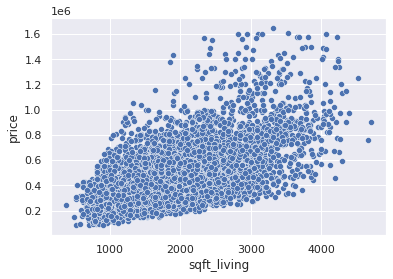

In [14]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = new_kc)

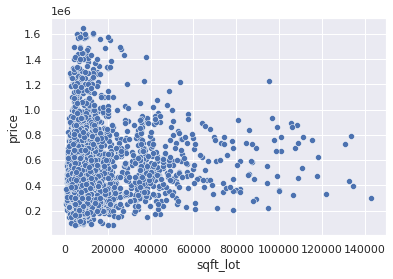

In [15]:
sns.scatterplot(x = 'sqft_lot', y = 'price', data = new_kc)

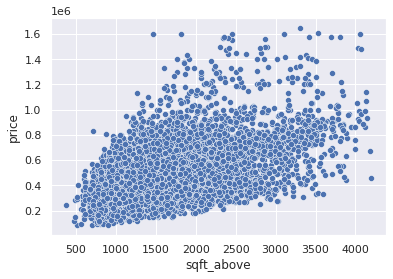

In [16]:
sns.scatterplot(x = 'sqft_above', y = 'price', data = new_kc)

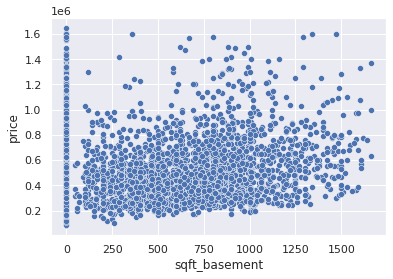

In [17]:
sns.scatterplot(x = 'sqft_basement', y = 'price', data = new_kc)

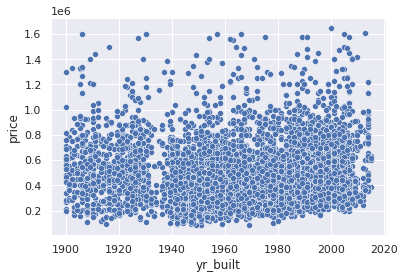

In [18]:
sns.scatterplot(x = 'yr_built', y = 'price', data = new_kc)

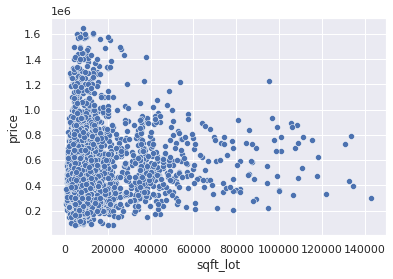

In [19]:
sns.scatterplot(x = 'sqft_lot', y = 'price', data = new_kc)

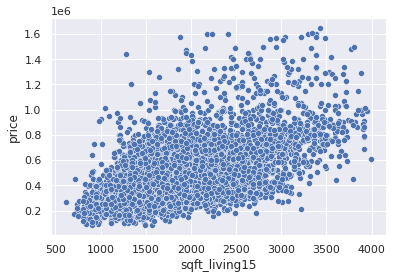

In [20]:
sns.scatterplot(x = 'sqft_living15', y = 'price', data = new_kc)

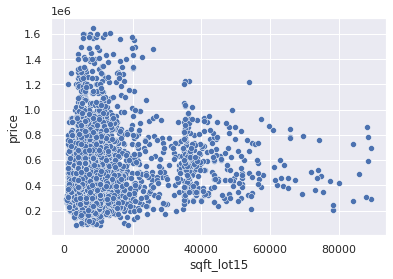

In [21]:
sns.scatterplot(x = 'sqft_lot15', y = 'price', data = new_kc)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8fd49f748>,
      dtype=object)

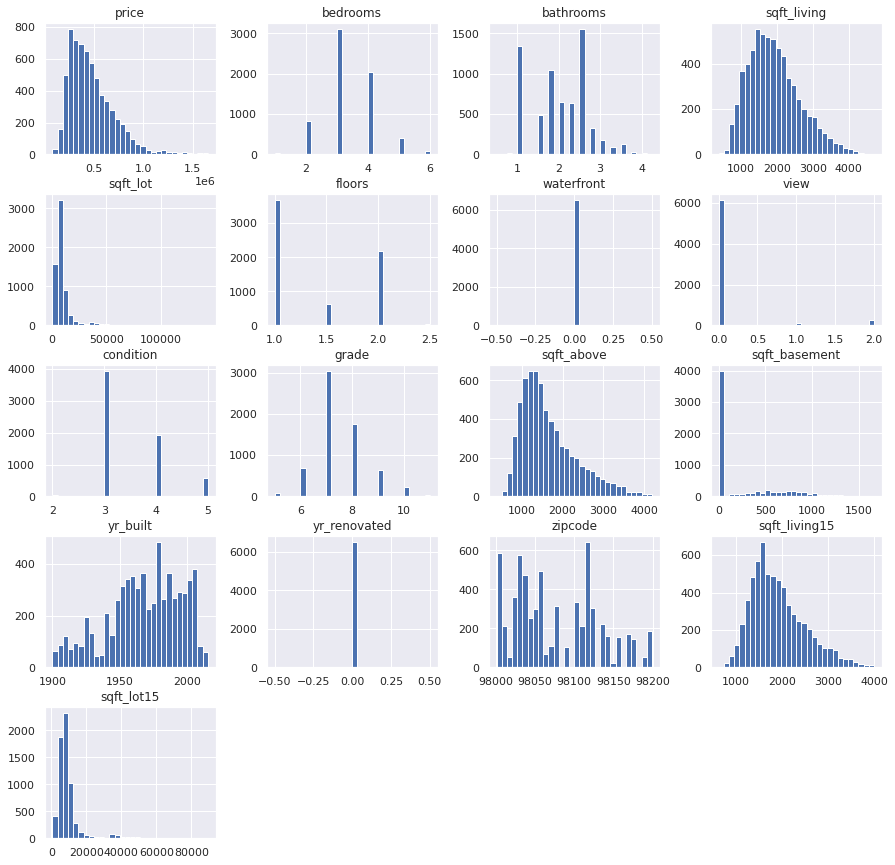

In [22]:
new_kc.hist(bins = 30, figsize = (15,15))

In [81]:
num = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15']

corr_df = new_kc[num]
cor = corr_df.corr(method = 'pearson')
print(cor)

               bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.500993  ...       0.389293    0.088689
bathrooms      0.500993   1.000000  ...       0.571373    0.127414
sqft_living    0.595152   0.736433  ...       0.742826    0.236432
sqft_lot       0.092292   0.111351  ...       0.272506    0.825293
floors         0.259567   0.526241  ...       0.405153    0.006500
sqft_above     0.468014   0.640730  ...       0.726621    0.235675
sqft_basement  0.274747   0.233755  ...       0.097314    0.023388
yr_built       0.189610   0.555099  ...       0.401110    0.158559
zipcode       -0.166113  -0.247268  ...      -0.280857   -0.198634
sqft_living15  0.389293   0.571373  ...       1.000000    0.301888
sqft_lot15     0.088689   0.127414  ...       0.301888    1.000000

[11 rows x 11 columns]


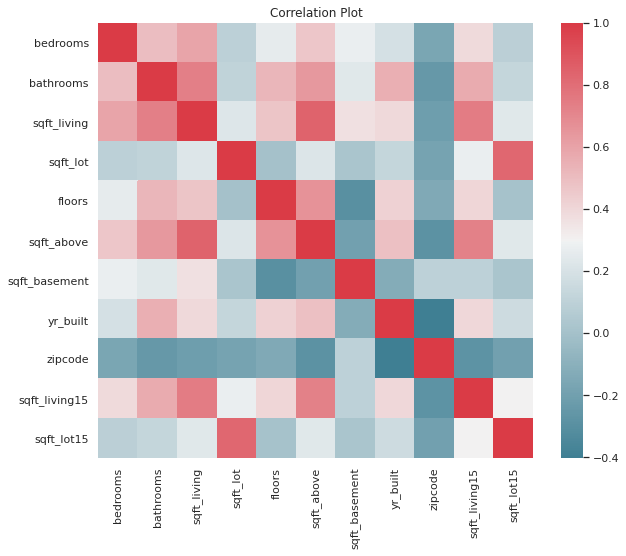

In [83]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.title("Correlation Plot")
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square=True, ax=ax)
plt.show()

# Machine Learning Models for Regression

## Data Preprocessing


### Data Split

In [23]:
from sklearn.model_selection import train_test_split
X = new_kc.iloc[:, 1:17]
y = new_kc['price']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_org.shape, X_test_org.shape

((4879, 16), (1627, 16))

### Scaling

In [24]:
# Select numerical data to scale
cat_cols = ['waterfront', 'view', 'condition', 'grade', 'yr_renovated']
cols = list(X_train_org.columns)
num_cols = []
for i in cols:
  if i not in cat_cols:
    num_cols.append(i)
print(num_cols)
X_train_org[num_cols]

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15']


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
4700,4,2.00,2250,4200,1.5,1650,600,1909,98122,1200,3360
3021,3,2.75,2010,11200,1.0,1360,650,1979,98028,2200,10640
1529,4,2.50,3260,5608,2.0,3260,0,2003,98029,3010,5608
559,4,2.50,2050,10271,2.0,2050,0,1998,98042,2050,8103
3752,4,2.25,2070,20280,2.0,2070,0,1968,98072,2190,21560
...,...,...,...,...,...,...,...,...,...,...,...
5767,4,2.00,2310,31850,1.5,2310,0,1984,98072,2710,36042
3812,4,2.50,3290,7538,2.0,3290,0,2004,98075,3450,7538
1941,3,2.25,3370,11757,2.0,3370,0,1980,98006,2690,10500
3046,3,1.00,1330,10500,1.0,960,370,1963,98034,1460,11550


In [25]:
# If there are outliers, use 'RobustScaler()', otherwise we could remove the outliers, if we know the data
# is normal distributed, use StandardScalar(), otherwise use MinMaxScalar()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_org[num_cols] = scaler.fit_transform(X_train_org[num_cols])
X_train = X_train_org.to_numpy()
print(X_train)
X_test_org[num_cols] = scaler.transform(X_test_org[num_cols])
X_test = X_test_org.to_numpy()
print(X_test)

[[0.6        0.4        0.41805226 ... 0.61111111 0.17210682 0.03046098]
 [0.4        0.6        0.36104513 ... 0.13636364 0.46884273 0.11259279]
 [0.6        0.53333333 0.65795724 ... 0.14141414 0.70919881 0.05582256]
 ...
 [0.4        0.46666667 0.68408551 ... 0.02525253 0.61424332 0.11101334]
 [0.4        0.13333333 0.19952494 ... 0.16666667 0.24925816 0.12285927]
 [0.4        0.73333333 0.60095012 ... 0.56060606 0.71216617 0.07942417]]
[[0.4        0.33333333 0.32304038 ... 0.03535354 0.37388724 0.07807035]
 [0.6        0.33333333 0.35391924 ... 0.16666667 0.37091988 0.08190618]
 [0.4        0.53333333 0.50356295 ... 0.25757576 0.59050445 0.08797581]
 ...
 [0.6        0.46666667 0.29453682 ... 0.         0.27596439 0.08190618]
 [0.2        0.33333333 0.2304038  ... 0.20707071 0.31454006 0.08513279]
 [0.4        0.26666667 0.28741093 ... 0.01515152 0.59643917 0.18858729]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

### Feature Selection: LASSO

In [26]:
cols = X.columns
print(cols)
df = pd.DataFrame(X_train, index=X_train_org.index, columns=cols)
df

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
4700,0.6,0.400000,0.418052,0.025316,0.333333,0.0,0.0,3.0,7.0,0.315364,0.361446,0.078261,0.0,0.611111,0.172107,0.030461
3021,0.4,0.600000,0.361045,0.074541,0.000000,0.0,0.0,3.0,8.0,0.237197,0.391566,0.686957,0.0,0.136364,0.468843,0.112593
1529,0.6,0.533333,0.657957,0.035217,0.666667,0.0,0.0,3.0,9.0,0.749326,0.000000,0.895652,0.0,0.141414,0.709199,0.055823
559,0.6,0.533333,0.370546,0.068008,0.666667,0.0,0.0,3.0,7.0,0.423181,0.000000,0.852174,0.0,0.207071,0.424332,0.083971
3752,0.6,0.466667,0.375297,0.138394,0.666667,0.0,0.0,4.0,7.0,0.428571,0.000000,0.591304,0.0,0.358586,0.465875,0.235791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,0.6,0.400000,0.432304,0.219756,0.333333,0.0,0.0,4.0,8.0,0.493261,0.000000,0.730435,0.0,0.358586,0.620178,0.399174
3812,0.6,0.533333,0.665083,0.048789,0.666667,0.0,0.0,3.0,9.0,0.757412,0.000000,0.904348,0.0,0.373737,0.839763,0.077597
1941,0.4,0.466667,0.684086,0.078458,0.666667,0.0,2.0,4.0,9.0,0.778976,0.000000,0.695652,0.0,0.025253,0.614243,0.111013
3046,0.4,0.133333,0.199525,0.069619,0.000000,0.0,0.0,3.0,7.0,0.129380,0.222892,0.547826,0.0,0.166667,0.249258,0.122859


In [27]:
from sklearn.linear_model import Lasso
# fit the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
print(lasso.coef_)
print(df.columns[lasso.coef_ == 0])

[ -87819.88179291  138780.44099679  735173.50954984   73743.10952091
   49394.31587774       0.           23967.45806123   20264.59498838
  103302.20858886 -351914.86702364 -129263.04758656 -396521.68789943
       0.           -5456.69305658  210003.08635808 -139831.09154418]
Index(['waterfront', 'yr_renovated'], dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41232340404823.25, tolerance: 26016856748.171013
  positive)


In [28]:
# Remove variables: "waterfront", "yr_renovated"
X_train_org.drop(["waterfront", "yr_renovated"], axis=1, inplace=True)
X_test_org.drop(["waterfront", "yr_renovated"], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
# Convert training and testing to numpy array for machine learning modeling
X_train = X_train_org.to_numpy()
X_test = X_test_org.to_numpy()

## Bagging (bootstrap = True)

In [30]:
from sklearn.ensemble import BaggingRegressor

### Decision Tree Regressor

In [31]:
# GridSearch finds the best max_depth & min_samples_split for DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15],
              'min_samples_split': [2, 3, 4]}

dtr = DecisionTreeRegressor(random_state = 0)
grid = GridSearchCV(dtr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 3}


In [32]:
# GridSearch finds the max_samples & n_estimators for BaggingRegressor
param_grid = {'n_estimators': [200, 400, 600],
              'max_samples': [100, 200]}

dtr = DecisionTreeRegressor(max_depth = 10, min_samples_split=3)
bag_dtr = BaggingRegressor(dtr, bootstrap = True, n_jobs = -1, random_state = 0)
grid = GridSearchCV(bag_dtr, param_grid, cv = 3, return_train_score = True)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'max_samples': 200, 'n_estimators': 600}


In [33]:
bag_dtr = BaggingRegressor(dtr, max_samples = 200, n_estimators = 600, bootstrap = True, n_jobs = -1, random_state = 0)
bag_dtr.fit(X_train, y_train)

print('Decision Tree Regressor - Training score(R^2): {:.3f}'.format(bag_dtr.score(X_train, y_train)))
print('Decision Tree Regressor - Testing score(R^2): {:.3f}'.format(bag_dtr.score(X_test, y_test)))

Decision Tree Regressor - Training score(R^2): 0.653
Decision Tree Regressor - Testing score(R^2): 0.615


### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

param_grid = {'n_estimators': [200, 400, 600],
              'max_samples': [100, 200]}

lr = LinearRegression()
bag_lr = BaggingRegressor(lr, bootstrap = True, n_jobs = -1, random_state = 0)
grid = GridSearchCV(bag_lr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'max_samples': 200, 'n_estimators': 600}


In [35]:
bag_lr = BaggingRegressor(lr, max_samples = 200, n_estimators = 600, bootstrap = True, n_jobs = -1, random_state = 0)
bag_lr.fit(X_train, y_train)

print('Linear Regression - Training score(R^2): {:.3f}'.format(bag_lr.score(X_train, y_train)))
print('Linear Regression - Testing score(R^2): {:.3f}'.format(bag_lr.score(X_test, y_test)))

Linear Regression - Training score(R^2): 0.584
Linear Regression - Testing score(R^2): 0.572


## Pasting (bootstrap = False)

### Decision Tree Regressor

In [36]:
bag_dtr = BaggingRegressor(dtr, max_samples = 200, n_estimators = 600, bootstrap = False, n_jobs = -1, random_state = 0)
bag_dtr.fit(X_train, y_train)

print('Decision Tree Regressor - Training score(R^2): {:.3f}'.format(bag_dtr.score(X_train, y_train)))
print('Decision Tree Regressor - Testing score(R^2): {:.3f}'.format(bag_dtr.score(X_test, y_test)))

Decision Tree Regressor - Training score(R^2): 0.653
Decision Tree Regressor - Testing score(R^2): 0.617


### Linear Regression

In [37]:
bag_lr = BaggingRegressor(lr, max_samples = 200, n_estimators = 600, bootstrap = False, n_jobs = -1, random_state = 0)
bag_lr.fit(X_train, y_train)

print('Linear Regression - Training score(R^2): {:.3f}'.format(bag_lr.score(X_train, y_train)))
print('Linear Regression - Testing score(R^2): {:.3f}'.format(bag_lr.score(X_test, y_test)))

Linear Regression - Training score(R^2): 0.584
Linear Regression - Testing score(R^2): 0.572


## AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostRegressor

### Decision Tree Regressor

In [39]:
# find best learning_rate & n_estimators
param_grid = {'n_estimators': [200, 400, 600],
              'learning_rate': [0.01, 0.1, 1]}

dtr = DecisionTreeRegressor(max_depth = 10, min_samples_split=3)
ada_dtr = AdaBoostRegressor(dtr, random_state = 0)
grid = GridSearchCV(ada_dtr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'learning_rate': 1, 'n_estimators': 400}


In [40]:
ada_dtr = AdaBoostRegressor(dtr, learning_rate = 1, n_estimators = 400, random_state = 0)
ada_dtr.fit(X_train, y_train)
print('Decision Tree Regressor - Training score(R^2): {:.3f}'.format(ada_dtr.score(X_train, y_train)))
print('Decision Tree Regressor - Testing score(R^2): {:.3f}'.format(ada_dtr.score(X_test, y_test)))

Decision Tree Regressor - Training score(R^2): 0.922
Decision Tree Regressor - Testing score(R^2): 0.749


### Linear Regression

In [41]:
param_grid = {'n_estimators': [200, 400, 600],
              'learning_rate': [0.01, 0.1, 1]}

lr = LinearRegression()
ada_lr = AdaBoostRegressor(lr, random_state = 0)
grid = GridSearchCV(ada_lr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 200}


In [42]:
ada_lr = AdaBoostRegressor(lr,  learning_rate = 0.01,n_estimators = 200, random_state = 0)
ada_lr.fit(X_train, y_train)
print('Linear Regression - Training score(R^2): {:.3f}'.format(ada_lr.score(X_train, y_train)))
print('Linear Regression - Testing score(R^2): {:.3f}'.format(ada_lr.score(X_test, y_test)))

Linear Regression - Training score(R^2): 0.579
Linear Regression - Testing score(R^2): 0.565


## Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'max_depth' : [3, 4, 5],
              'n_estimators' : [200, 400, 600],
              'learning_rate' : [0.01, 0.1, 1]}

gbr = GradientBoostingRegressor(random_state=0)
grid = GridSearchCV(gbr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 600}


In [44]:
gbr = GradientBoostingRegressor( learning_rate = 0.1, max_depth = 3, n_estimators = 600, random_state=0)
gbr.fit(X_train, y_train)
print('Training score(R^2): {:.3f}'.format(gbr.score(X_train, y_train)))
print('Testing score(R^2): {:.3f}'.format(gbr.score(X_test, y_test)))

Training score(R^2): 0.928
Testing score(R^2): 0.826


# Conclusion Table
---
Machine Learning Algorithm | R^2 | Bagging | Pasting| Adaboost | Gradient Boosting
--- | --- | --- | --- | --- | --- 
Decision Tree Regressor | Train | 0.653 | 0.653 | 0.922 |
 | Test | 0.615 | 0.617 | 0.749 |
 Linear Regression | Train | 0.584 | 0.584 | 0.579
 | Test | 0.572 | 0.572 | 0.565 |
 Gradient Boosting | Train | | | | 0.928 |
 | Test | | | | 0.826 |

# Deep Learning Model


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

np.random.seed(10)

In [54]:
X_train.shape

(4879, 14)

## 1. Define Model
The number of total feature is 14, so input_dim is 14. I pick 8 nodes for the first layer, 4 nodes for the second layer, the last layer is 1. **ReLu** is the activation function. There is no function in the last layer for regression problem.

In [115]:
dl = Sequential()
dl.add(Dense(17, input_dim = 14, kernel_initializer = 'normal', activation = 'relu')) 
dl.add(Dense(9, kernel_initializer = 'normal', activation = 'relu'))
dl.add(Dense(1, kernel_initializer = 'normal', activation='linear'))
dl.summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 17)                255       
_________________________________________________________________
dense_207 (Dense)            (None, 9)                 162       
_________________________________________________________________
dense_208 (Dense)            (None, 1)                 10        
Total params: 427
Trainable params: 427
Non-trainable params: 0
_________________________________________________________________


## 2. Compile Model
For regression, **MAE** is the metric to evaluate model.

In [108]:
dl.compile(loss='mae', optimizer='adam', metrics=['mae'])

## 3. Fit Model
The model will literate 100 times, for each time it has batch_size of 10. The MAE will getting smaller until it becomes **stable**.

In [109]:
dl.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
488/488 [==============================] - 1s 1ms/step - loss: 473011.1214 - mae: 473011.1214
Epoch 2/100
488/488 [==============================] - 1s 1ms/step - loss: 477150.3630 - mae: 477150.3630
Epoch 3/100
488/488 [==============================] - 1s 1ms/step - loss: 470363.3758 - mae: 470363.3767
Epoch 4/100
488/488 [==============================] - 1s 1ms/step - loss: 460095.0348 - mae: 460095.0343
Epoch 5/100
488/488 [==============================] - 1s 1ms/step - loss: 451077.5333 - mae: 451077.5333
Epoch 6/100
488/488 [==============================] - 1s 1ms/step - loss: 428949.0208 - mae: 428949.0210
Epoch 7/100
488/488 [==============================] - 1s 1ms/step - loss: 402716.1494 - mae: 402716.1446
Epoch 8/100
488/488 [==============================] - 1s 1ms/step - loss: 367885.3042 - mae: 367885.3042
Epoch 9/100
488/488 [==============================] - 1s 1ms/step - loss: 326478.3804 - mae: 326478.3804
Epoch 10/100
488/488 [========================

## 4. Evaluate Model

In [110]:
dl.evaluate(X_test, y_test)

51/51 [==============================] - 0s 967us/step - loss: 138780.2344 - mae: 138780.2344


[138780.234375, 138780.234375]

In [113]:
from sklearn.metrics import r2_score

y_train_predict = dl.predict(X_train)
y_test_predict = dl.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.38
Test score: 0.36


## GridSearch

In [104]:
def dl():
    dl = Sequential()
    dl.add(Dense(17, input_dim = 14, kernel_initializer = 'normal', activation = 'relu')) 
    dl.add(Dense(9, kernel_initializer = 'normal', activation = 'relu'))
    dl.add(Dense(1, kernel_initializer = 'normal', activation='linear'))

    dl.compile(loss='mae', optimizer='adam', metrics=['mae'])
    
    return dl

In [105]:
from sklearn.model_selection import GridSearchCV

kr = KerasRegressor(build_fn = dl, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 
              'epochs':[10, 50, 100]}

grid = GridSearchCV(estimator= kr, param_grid = param_grid, cv = 5)
grid.fit(X_test, y_test)
print('Best Parameters: ', grid.best_params_)

Best Parameters:  {'batch_size': 10, 'epochs': 100}
